Sample data:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
Dataset Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4  

<ipython-input-11-c785f5026c46>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


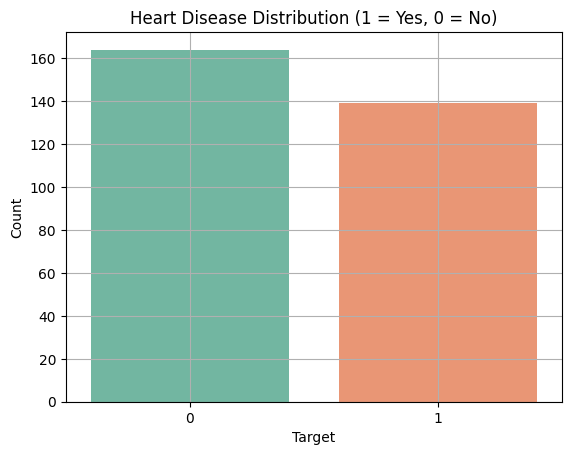

Model Evaluation:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



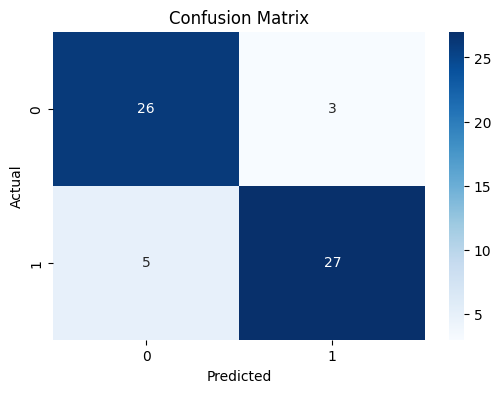

In [11]:
# HEART DISEASE PREDICTION PROJECT

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

# Step 2: Load the data
df = pd.read_csv("/content/4. Predict Heart Disease.csv")  # Ensure this file is uploaded in Colab
print("Sample data:", df.head())

# Step 3: Explore the data
print("Dataset Shape:", df.shape)
df.info()
print("Summary:", df.describe())

# Step 4: Missing values
print("Missing values:", df.isnull().sum())

# Step 5: Target distribution visualization
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Heart Disease Distribution (1 = Yes, 0 = No)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Step 6: Feature and target selection
X = df.drop("target", axis=1)
y = df["target"]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:", report)

# Step 12: Show confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')